In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import plotly.express as px # to plot the time series plot
from sklearn import metrics # for the evaluation
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [127]:
df = pd.read_csv("train.csv")
df.head()

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
0,2009,1,1,0,0,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0
1,2009,1,1,0,30,0,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0
2,2009,1,1,1,0,0,0,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0
3,2009,1,1,1,30,0,0,0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0
4,2009,1,1,2,0,0,0,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0


In [128]:
df.dtypes

Year                    int64
Month                   int64
Day                     int64
Hour                    int64
Minute                  int64
Clearsky DHI            int64
Clearsky DNI            int64
Clearsky GHI            int64
Cloud Type              int64
Dew Point             float64
Temperature           float64
Pressure                int64
Relative Humidity     float64
Solar Zenith Angle    float64
Precipitable Water    float64
Wind Direction        float64
Wind Speed            float64
Fill Flag               int64
dtype: object

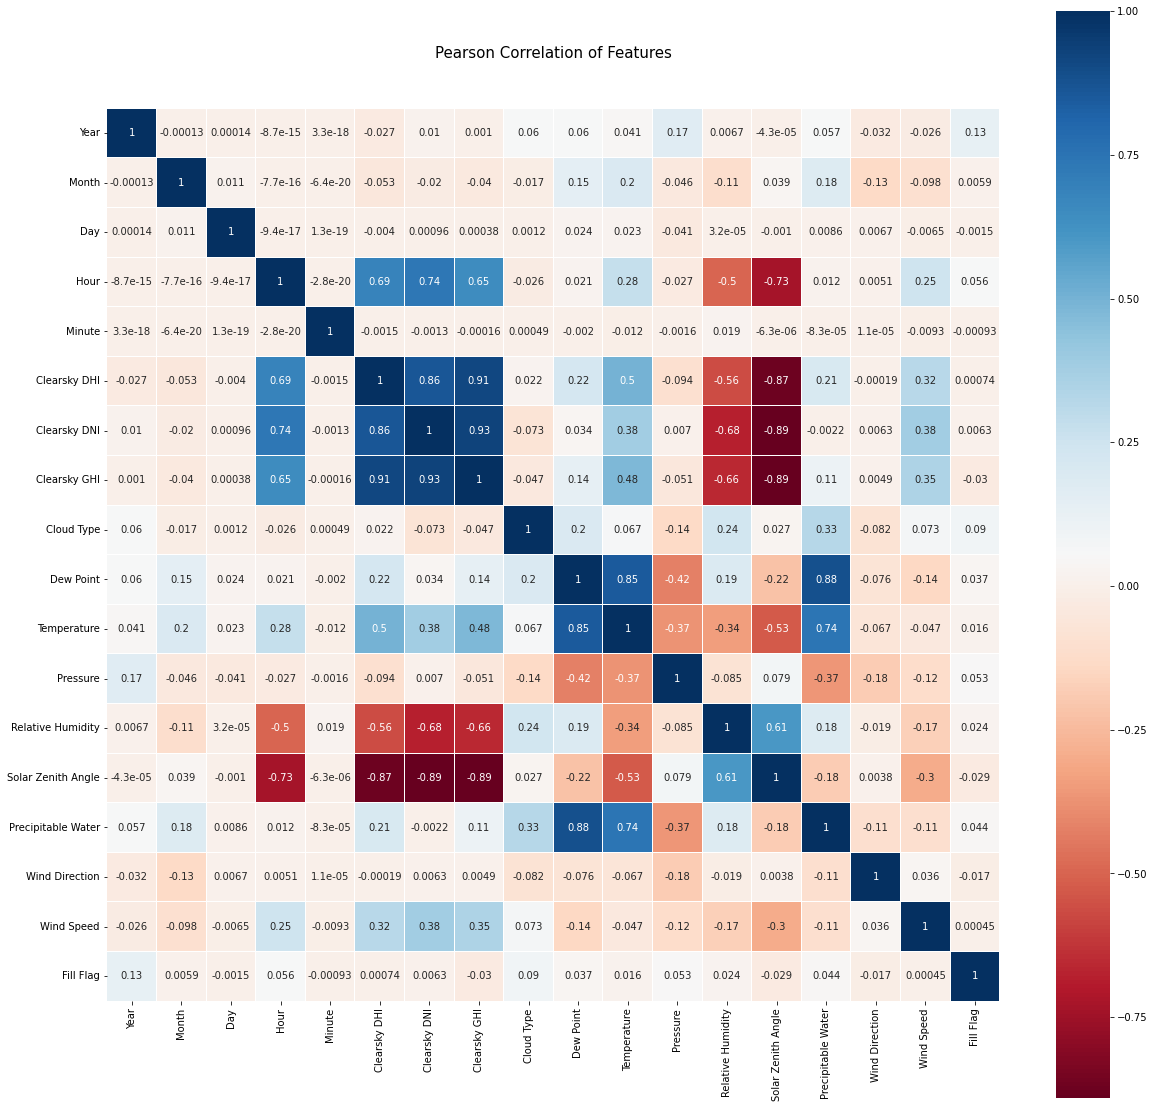

In [129]:
colormap = plt.cm.RdBu
plt.figure(figsize=(20,20))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [130]:
df['Datetime'] = df[['Year', 'Month', 'Day','Hour','Minute']].apply(lambda x: '{}-{}-{} {}:{}:00'.format(x[0], x[1], x[2],x[3],x[4]), axis=1)

In [131]:
#from datetime import datetime
#datetime.strptime("21-02-2021 18:46:00", "%d-%m-%Y %H:%M:%S")
df = df.drop(['Year','Month','Day','Hour','Minute'],axis=1)
df.head()

,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,Datetime
0,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0,2009-1-1 0:0:00
1,0,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0,2009-1-1 0:30:00
2,0,0,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0,2009-1-1 1:0:00
3,0,0,0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0,2009-1-1 1:30:00
4,0,0,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0,2009-1-1 2:0:00


In [132]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Datetime'] = pd.to_datetime(df['Datetime'],format='%d-%m-%Y %H:%M')
df.head()

,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,Datetime
0,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0,2009-01-01 00:00:00
1,0,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0,2009-01-01 00:30:00
2,0,0,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0,2009-01-01 01:00:00
3,0,0,0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0,2009-01-01 01:30:00
4,0,0,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0,2009-01-01 02:00:00


In [133]:
df['year']=df['Datetime'].dt.year 

df['month']=df['Datetime'].dt.month 

df['day']=df['Datetime'].dt.day

df['dayofweek_num']=df['Datetime'].dt.dayofweek

df.head()


,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,Datetime,year,month,day,dayofweek_num
0,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0,2009-01-01 00:00:00,2009,1,1,3
1,0,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0,2009-01-01 00:30:00,2009,1,1,3
2,0,0,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0,2009-01-01 01:00:00,2009,1,1,3
3,0,0,0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0,2009-01-01 01:30:00,2009,1,1,3
4,0,0,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0,2009-01-01 02:00:00,2009,1,1,3


In [134]:
df['Hour'] = df['Datetime'].dt.hour 
df['minute'] = df['Datetime'].dt.minute 
df.head()

,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,Datetime,year,month,day,dayofweek_num,Hour,minute
0,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0,2009-01-01 00:00:00,2009,1,1,3,0,0
1,0,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0,2009-01-01 00:30:00,2009,1,1,3,0,30
2,0,0,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0,2009-01-01 01:00:00,2009,1,1,3,1,0
3,0,0,0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0,2009-01-01 01:30:00,2009,1,1,3,1,30
4,0,0,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0,2009-01-01 02:00:00,2009,1,1,3,2,0


In [135]:
df['rolling_mean_DHI'] = df['Clearsky DHI'].rolling(window=7).mean().fillna(method='bfill').fillna(method='ffill')
df['rolling_mean_DNI'] = df['Clearsky DNI'].rolling(window=7).mean().fillna(method='bfill').fillna(method='ffill')
df['rolling_mean_GHI'] = df['Clearsky GHI'].rolling(window=7).mean().fillna(method='bfill').fillna(method='ffill')

df.head(10)

#Try with Expanding Mean Also

,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,Datetime,year,month,day,dayofweek_num,Hour,minute,rolling_mean_DHI,rolling_mean_DNI,rolling_mean_GHI
0,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0,2009-01-01 00:00:00,2009,1,1,3,0,0,0.0,0.0,0.0
1,0,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0,2009-01-01 00:30:00,2009,1,1,3,0,30,0.0,0.0,0.0
2,0,0,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0,2009-01-01 01:00:00,2009,1,1,3,1,0,0.0,0.0,0.0
3,0,0,0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0,2009-01-01 01:30:00,2009,1,1,3,1,30,0.0,0.0,0.0
4,0,0,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0,2009-01-01 02:00:00,2009,1,1,3,2,0,0.0,0.0,0.0
5,0,0,0,4,0.0,3.0,1010,82.02,137.48,0.476,350.0,3.2,0,2009-01-01 02:30:00,2009,1,1,3,2,30,0.0,0.0,0.0
6,0,0,0,4,0.0,3.0,1010,78.12,143.85,0.477,359.8,3.5,0,2009-01-01 03:00:00,2009,1,1,3,3,0,0.0,0.0,0.0
7,0,0,0,1,0.0,2.0,1010,83.87,150.17,0.481,359.8,3.1,0,2009-01-01 03:30:00,2009,1,1,3,3,30,0.0,0.0,0.0
8,0,0,0,4,0.0,2.0,1010,82.62,156.39,0.486,8.3,2.8,0,2009-01-01 04:00:00,2009,1,1,3,4,0,0.0,0.0,0.0
9,0,0,0,4,0.0,1.0,1010,88.74,162.35,0.490,8.3,2.5,0,2009-01-01 04:30:00,2009,1,1,3,4,30,0.0,0.0,0.0


In [136]:
df.columns

Index(['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'Cloud Type',
       'Dew Point', 'Temperature', 'Pressure', 'Relative Humidity',
       'Solar Zenith Angle', 'Precipitable Water', 'Wind Direction',
       'Wind Speed', 'Fill Flag', 'Datetime', 'year', 'month', 'day',
       'dayofweek_num', 'Hour', 'minute', 'rolling_mean_DHI',
       'rolling_mean_DNI', 'rolling_mean_GHI'],
      dtype='object')

In [137]:
newdf = df[['Datetime','year', 'month', 'day',
       'dayofweek_num','Hour', 'minute','Cloud Type',
       'Dew Point', 'Temperature', 'Pressure', 'Relative Humidity',
       'Solar Zenith Angle', 'Precipitable Water', 'Wind Direction',
       'Wind Speed', 'Fill Flag','Clearsky DHI','rolling_mean_DHI']]

newdf.head()

,Datetime,year,month,day,dayofweek_num,Hour,minute,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,Clearsky DHI,rolling_mean_DHI
0,2009-01-01 00:00:00,2009,1,1,3,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0,0,0.0
1,2009-01-01 00:30:00,2009,1,1,3,0,30,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0,0,0.0
2,2009-01-01 01:00:00,2009,1,1,3,1,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0,0,0.0
3,2009-01-01 01:30:00,2009,1,1,3,1,30,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0,0,0.0
4,2009-01-01 02:00:00,2009,1,1,3,2,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0,0,0.0


In [138]:
df['Datetime'].min(), df['Datetime'].max(), (df['Datetime'].max() -df['Datetime'].min())

(Timestamp('2009-01-01 00:00:00'),
 Timestamp('2018-12-31 23:30:00'),
 Timedelta('3651 days 23:30:00'))

In [139]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

train = df[df['Datetime'] < '2017-12-31 00:00:00']
valid = df[df['Datetime'] > '2017-12-31 00:00:00']

In [140]:
train = train.drop(['Datetime'], axis = 1)
valid = valid.drop(['Datetime'], axis = 1)

In [145]:
train.head()

,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,year,month,day,dayofweek_num,Hour,minute,rolling_mean_DHI,rolling_mean_DNI,rolling_mean_GHI
0,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0,2009,1,1,3,0,0,0.0,0.0,0.0
1,0,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0,2009,1,1,3,0,30,0.0,0.0,0.0
2,0,0,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0,2009,1,1,3,1,0,0.0,0.0,0.0
3,0,0,0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0,2009,1,1,3,1,30,0.0,0.0,0.0
4,0,0,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0,2009,1,1,3,2,0,0.0,0.0,0.0


In [146]:
from sklearn.ensemble import GradientBoostingRegressor  #GBM algorithm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from pandas import DataFrame
from pandas import concat
from numpy import asarray
from matplotlib import pyplot

In [147]:
model1 = GradientBoostingRegressor(learning_rate=0.01, max_depth=7, n_estimators=1000)
y_DHI = train['Clearsky DHI']
x_DHI = train.drop(['Clearsky DHI','Clearsky DNI','Clearsky GHI','rolling_mean_DNI','rolling_mean_GHI'],axis = 1)

y_val_DHI = valid['Clearsky DHI']
x_val_DHI = valid.drop(['Clearsky DHI','Clearsky DNI','Clearsky GHI','rolling_mean_DNI','rolling_mean_GHI'],axis = 1)

In [148]:
model1.fit(x_DHI,y_DHI)
y_pred_DHI = model1.predict(x_val_DHI)
print(mean_squared_error(y_val_DHI,y_pred_DHI))

21.117734274383153


In [157]:
model2 = GradientBoostingRegressor(learning_rate=0.01, max_depth=7, n_estimators=1000)
y_DNI = train['Clearsky DNI']
x_DNI = train.drop(['Clearsky DHI','Clearsky DNI','Clearsky GHI','rolling_mean_DHI','rolling_mean_GHI'],axis = 1)

y_val_DNI = valid['Clearsky DNI']
x_val_DNI = valid.drop(['Clearsky DHI','Clearsky DNI','Clearsky GHI','rolling_mean_DHI','rolling_mean_GHI'],axis = 1)

In [161]:
model2.fit(x_DNI,y_DNI)
y_pred_DNI = model2.predict(x_val_DNI)
print(mean_squared_error(y_val_DNI,y_pred_DNI))

187.04651361042647


In [163]:
model3 = GradientBoostingRegressor(learning_rate=0.01, max_depth=7, n_estimators=1000)
y_GHI = train['Clearsky GHI']
x_GHI = train.drop(['Clearsky DHI','Clearsky DNI','Clearsky GHI','rolling_mean_DNI','rolling_mean_DHI'],axis = 1)

y_val_GHI = valid['Clearsky GHI']
x_val_GHI = valid.drop(['Clearsky DHI','Clearsky DNI','Clearsky GHI','rolling_mean_DNI','rolling_mean_DHI'],axis = 1)

In [164]:
model3.fit(x_GHI, y_GHI)
y_pred_GHI = model3.predict(x_val_GHI)
print(mean_squared_error(y_val_GHI, y_pred_GHI))

30.578918071947346


In [186]:
sub = pd.DataFrame(columns = ['Clearsky DHI', 'Clearsky DNI','Clearsky GHI'])

In [187]:
test = pd.read_csv("test.csv")

In [188]:
train.columns

Index(['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'Cloud Type',
       'Dew Point', 'Temperature', 'Pressure', 'Relative Humidity',
       'Solar Zenith Angle', 'Precipitable Water', 'Wind Direction',
       'Wind Speed', 'Fill Flag', 'year', 'month', 'day', 'dayofweek_num',
       'Hour', 'minute', 'rolling_mean_DHI', 'rolling_mean_DNI',
       'rolling_mean_GHI'],
      dtype='object')

In [189]:
test['Datetime'] = test[['Year', 'Month', 'Day','Hour','Minute']].apply(lambda x: '{}-{}-{} {}:{}:00'.format(x[0], x[1], x[2],x[3],x[4]), axis=1)
test = test.drop(['Year','Month','Day','Hour','Minute'],axis=1)
test['Datetime'] = pd.to_datetime(test['Datetime'])
test['Datetime'] = pd.to_datetime(test['Datetime'],format='%d-%m-%Y %H:%M')

test['year']=test['Datetime'].dt.year 

test['month']=test['Datetime'].dt.month 

test['day']=test['Datetime'].dt.day

test['dayofweek_num']=test['Datetime'].dt.dayofweek

test['Hour'] = test['Datetime'].dt.hour 
test['minute'] = test['Datetime'].dt.minute 

test['rolling_mean_DHI'] = test['Clearsky DHI'].rolling(window=7).mean().fillna(0)
test['rolling_mean_DNI'] = test['Clearsky DNI'].rolling(window=7).mean().fillna(0)
test['rolling_mean_GHI'] = test['Clearsky GHI'].rolling(window=7).mean().fillna(0)


In [190]:
test = test.drop(['Datetime'], axis = 1)

In [191]:
test.head()

,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,Clearsky DHI,Clearsky DNI,Clearsky GHI,year,month,day,dayofweek_num,Hour,minute,rolling_mean_DHI,rolling_mean_DNI,rolling_mean_GHI
0,7,18.4,18.8,1008,97.70,106.23,3.5,190,2.3,0,NaN,NaN,NaN,2019,1,1,1,0,0,0.0,0.0,0.0
1,3,18.4,18.6,1008,98.92,112.36,3.5,187,2.5,0,NaN,NaN,NaN,2019,1,1,1,0,30,0.0,0.0,0.0
2,3,18.2,18.5,1008,98.35,118.58,3.5,184,2.8,0,NaN,NaN,NaN,2019,1,1,1,1,0,0.0,0.0,0.0
3,3,18.2,18.3,1008,99.58,124.86,3.5,185,3.0,0,NaN,NaN,NaN,2019,1,1,1,1,30,0.0,0.0,0.0
4,0,18.0,18.0,1008,99.71,131.20,3.6,186,3.1,0,NaN,NaN,NaN,2019,1,1,1,2,0,0.0,0.0,0.0


In [193]:
test.describe()

,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,Clearsky DHI,Clearsky DNI,Clearsky GHI,year,month,day,dayofweek_num,Hour,minute,rolling_mean_DHI,rolling_mean_DNI,rolling_mean_GHI
count,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,0.0,0.0,0.0,17520.0,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.0,17520.0,17520.0
mean,2.715811,14.623550,19.929817,1006.751370,75.165104,89.701282,2.989498,184.470491,2.252871,5.148916,NaN,NaN,NaN,2019.0,6.526027,15.720548,2.994521,11.500000,15.000000,0.0,0.0,0.0
std,3.159985,7.273676,9.087679,4.742727,20.121986,40.089410,1.492317,97.672316,1.238956,18.812279,NaN,NaN,NaN,0.0,3.447950,8.796498,2.000050,6.922384,15.000428,0.0,0.0,0.0
min,0.000000,-8.700000,-4.800000,988.000000,16.870000,8.570000,0.300000,0.000000,0.100000,0.000000,NaN,NaN,NaN,2019.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,0.000000,8.800000,13.000000,1003.000000,59.967500,56.432500,1.800000,92.000000,1.300000,0.000000,NaN,NaN,NaN,2019.0,4.000000,8.000000,1.000000,5.750000,0.000000,0.0,0.0,0.0
50%,0.000000,16.600000,21.100000,1007.000000,79.235000,89.450000,3.000000,192.000000,2.000000,0.000000,NaN,NaN,NaN,2019.0,7.000000,16.000000,3.000000,11.500000,15.000000,0.0,0.0,0.0
75%,7.000000,20.400000,26.400000,1010.000000,92.872500,123.040000,4.100000,265.000000,3.000000,0.000000,NaN,NaN,NaN,2019.0,10.000000,23.000000,5.000000,17.250000,30.000000,0.0,0.0,0.0
max,9.000000,25.700000,38.700000,1023.000000,100.000000,171.540000,6.800000,360.000000,8.200000,100.000000,NaN,NaN,NaN,2019.0,12.000000,31.000000,6.000000,23.000000,30.000000,0.0,0.0,0.0


In [194]:
x_test_DHI = test.drop(['Clearsky DHI','Clearsky DNI','Clearsky GHI','rolling_mean_DNI','rolling_mean_GHI'],axis = 1)

In [195]:
pred_DHI = model1.predict(x_test_DHI)
pred_DHI

array([-0.05536714, -0.01881451, -0.0156321 , ...,  7.93397574,
       -0.209741  , -1.17636074])

In [202]:
x_test_DNI = test.drop(['Clearsky DHI','Clearsky DNI','Clearsky GHI','rolling_mean_GHI','rolling_mean_DHI'],axis = 1)

In [204]:
pred_DNI = model2.predict(x_test_DNI)
pred_DNI

array([-0.05690983,  0.06263024,  0.02614437, ..., 22.10009474,
       -4.2786664 , -0.66489788])

In [205]:
x_test_GHI = test.drop(['Clearsky DHI','Clearsky DNI','Clearsky GHI','rolling_mean_DNI','rolling_mean_DHI'],axis = 1)

In [206]:
pred_GHI = model3.predict(x_test_GHI)
pred_GHI

array([ 0.14815534,  0.14989331,  0.2382568 , ..., 16.03891048,
        0.15768035,  0.02855905])

In [207]:
sub['Clearsky DHI'] = pred_DHI
sub['Clearsky DNI'] = pred_DNI
sub['Clearsky GHI'] = pred_GHI

In [208]:
sub.loc[ sub['Clearsky DHI'] <= 1, 'Clearsky DHI'] = 0
sub.loc[ sub['Clearsky DNI'] <= 10, 'Clearsky DNI'] = 0
sub.loc[ sub['Clearsky GHI'] <= 10, 'Clearsky GHI'] = 0

In [210]:
sub.to_csv('my_submission.csv', index=False)